In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reparameterisation of Gibbs free energy: explanation

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from common import set_theme
from synbio_morpher.utils.modelling.physical import equilibrium_constant_reparameterisation, gibbs_K_cal, eqconstant_to_rates
from synbio_morpher.utils.misc.units import per_mol_to_per_molecule

set_theme()

top_dir = os.path.join('figures', '02_reparameterisation')

In [27]:
E = np.arange(-30, 0, 0.1)
y0 = np.array([200])
k_f_Ms = 1000000
k_f = per_mol_to_per_molecule(k_f_Ms)

K_eq_gibbs = gibbs_K_cal(E)
K_eq_F = equilibrium_constant_reparameterisation(E, initial=y0)
k_f_gibbs, k_r_gibbs = eqconstant_to_rates(K_eq_gibbs, k_f)
k_f_F, k_r_F = eqconstant_to_rates(K_eq_F, k_f)

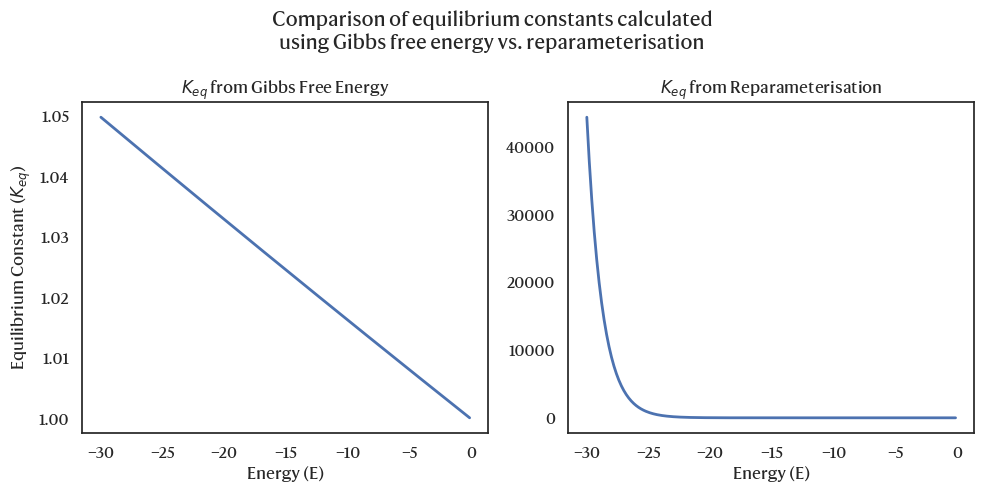

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(E, K_eq_gibbs, label='Gibbs', linewidth=2)
axs[0].set_xlabel('Energy (E)')
axs[0].set_ylabel('Equilibrium Constant ($K_{eq}$)')
axs[0].set_title('$K_{eq}$ from Gibbs Free Energy')

axs[1].plot(E, K_eq_F, label='F', linewidth=2)
axs[1].set_xlabel('Energy (E)')
axs[1].set_title('$K_{eq}$ from Reparameterisation')
plt.suptitle('Comparison of equilibrium constants calculated\nusing Gibbs free energy vs. reparameterisation')

plt.tight_layout()
plt.savefig(os.path.join(top_dir, 'equilibrium_constants_comparison.svg'), dpi=300)